## Data loading




**Reasoning**:
Import pandas and load the CSV file into a DataFrame, handling potential file not found errors. Then display the head and info of the DataFrame to confirm successful loading and inspect the data structure.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv("UpdatedResumeDataSet.csv")
    print("DataFrame loaded successfully.")
    display(df.head())
    print("\nDataFrame Info:")
    display(df.info())
except FileNotFoundError:
    print("Error: 'UpdatedResumeDataSet.csv' not found. Please make sure the file is in the correct directory.")
    df = None # Assign None to df if file loading fails
except Exception as e:
    print(f"An error occurred while loading the DataFrame: {e}")
    df = None

DataFrame loaded successfully.


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


None

## Text extraction



Based on the previous output, the 'Resume' column already contains the text content of the resumes. Therefore, I will directly use the text from the 'Resume' column and store it in a new column named 'extracted_text'.



In [ ]:
# Iterate through the DataFrame and use the text directly from the 'Resume' column
extracted_texts = []
for index, row in df.iterrows():
    resume_text = row['Resume']
    extracted_texts.append(resume_text)

# Add the extracted text as a new column to the DataFrame
df['extracted_text'] = extracted_texts

print("Extracted text added to the 'extracted_text' column.")
display(df.head())

Extracted text added to the 'extracted_text' column.


,Category,Resume,extracted_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details \r\n MCA YMCAUST, Faridab..."


 The text has been extracted into the 'extracted_text' column. Now, apply the previously defined `preprocess_text` function to clean and preprocess the text in the 'extracted_text' column and store the result in a new column called 'processed_text'.



In [ ]:
# Apply the preprocess_text function to the 'extracted_text' column
df['processed_text'] = df['extracted_text'].apply(preprocess_text)

print("Text preprocessing completed and stored in 'processed_text' column.")
display(df[['extracted_text', 'processed_text']].head())

Text preprocessing completed and stored in 'processed_text' column.


,extracted_text,processed_text
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 uitrgpv da...
2,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â r â python â sap hana â tableau â sap...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


## Feature extraction

Extract relevant features from the preprocessed text, such as keywords, skills, education, and experience.



Define functions to extract skills, education, and experience from the preprocessed text and apply them to the DataFrame.



## Feature extraction


Extract relevant features from the preprocessed text, such as keywords, skills, education, and experience.


Define functions to extract skills, education, and experience from the preprocessed text and apply them to the DataFrame.

In [ ]:
import spacy

# Load a pre-trained English model for named entity recognition
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Define a list of common skills (this can be expanded)
common_skills = [
    "python", "java", "c++", "sql", "excel", "tableau", "power bi", "aws", "azure",
    "machine learning", "deep learning", "data science",   " scrum", " agile", " kanban", " lean", " six sigma", " pmp", " prince2", " itil", " cobit", " devops", " srm", " erp",
    " crm", " bi", " etl", " qa", " ux", " ui", " seo", " sem", " social media marketing", " content marketing",
    " email marketing", " google analytics", " google ads", " facebook ads", " linkedin ads", " salesforce", " sap",
    " oracle", " microsoft dynamics", " workday", " successfactors", " netflix", " spotify", " uber", " airbnb", " google",
    " facebook", " amazon", " apple", " microsoft", " netflix", " spotify", " uber", " airbnb", " google", " facebook",
    " amazon", " apple", " microsoft", " tesla", " spacex", " nvidias", " amd", " intel", " samsung", " sony", " huawei",
    " xiaomi", " oppo", " vivo", " realme", " motorola", " lg", " dell", " hp", " lenovo", " asus", " acer", " toshiba",
    " fujitsu", " panasonic", " philips", " siemens", " bosch", " abb", " ge", " honeywell", " schneider electric",
    " 3m", " dupont", " basf", " dow", " sabic", " saudi aramco", " exxonmobil", " chevron", " bp", " shell", " totalenergies",
    " eni", " petrobras", " sinopec", " petrochina", " gazprom", " rosneft", " equinor", " repsol", " schlumberger",
    " halliburton", " baker hughes", " national oilwell varco", " tecnipfmc", " subsea 7", " saipem", " wood group",
    " aker solutions", " mcdermott international", " fluor", " bechtel", " skanska", " laing o'rourke", " vinci",
    " bouygues", " eiffage", " acciona", " ferrovial", " cbre", " jll", " knight frank", " savills", " colliers",
    " cushman & wakefield", " remax", " century 21", " keller williams", " Coldwell banker", " era", " re/max",
    " century 21", " keller williams", " coldwell banker", " era", " berkshire hathaway homeservices", " sotheby's",
    " christie's", " engel & völkers", " kpmg", " pwc", " ey", " Deloitte", " Accenture", " ibm", " cognizant", " infosys",
    " wipro", " tcs", " capgemini", " atose", " dxc technology", " ntt data", " tata consultancy services",
    " cognizant technology solutions", " infosys limited", " wipro limited", " tech mahindra", " hcl technologies",
    " mindtree", " l&t infotech", " mphasis", " persistent systems", " happiest minds", " zensar technologies",
    " infobeans", " ltts", " cyient", " kpIT technologies", " tata elxsi", " birlaSoft", " coforge", " sonata software",
    " newgen software", " route mobile", " bfl", " css corp", " hexaware technologies", " musigma", " fractal analytics",
    " genpact", " wns holdings", " exlservice holdings", " mindtree limited", " larsen & toubro infotech limited",
    " mphasis limited", " persistent systems limited", " happiest minds technologies limited", " zensar technologies limited",
    " infobeans technologies limited", " l&t technology services limited", " cyient limited", " kpit technologies limited",
    " tata elxsi limited", " birlasoft limited", " coforge limited", " sonata software limited", " newgen software technologies limited",
    " route mobile limited", " bajaj finance limited", " css corp private limited", " hexaware technologies limited",
    " musigma business solutions private limited", " fractal analytics private limited", " genpact limited",
    " wns holdings limited", " exlservice holdings inc", "adobee photoshop", "illustrator", "premiere pro", "after effects",
    "final cut pro", "avid media composer", "da vinci resolve", "blender", "maya", "3ds max", "cinema 4d", "sketchup",
    "autocad", "revit", "solidworks", "catia", "nx", " creo", " fusion 360", " inventor", " solid edge", " rhinoceros",
    " grasshopper", " dynamo", " archicad", " vectorworks", " microstation", " navisworks", " sketchup layout",
    " adobe indesign", " adobe xd", " figma", " sketch", " invision", " marvel", " protopie", "principle", "figma", "sketch", "invision", "marvel", "protopie",
    "principle", "framer", "origami studio", "adobe after effects", "adobe premiere pro", "final cut pro", "avid media composer",
    "da vinci resolve", "logic pro x", "ableton live", "fl studio", "pro tools", " cubase", " reason", " studio one", " reaper",
    "audacity", "adobe audition", "garageband", "logic pro", "ableton live", "fl studio", "pro tools", "cubase",
    "reason", "studio one", "reaper", "audacity", "adobe audition", "garageband", "microsoft word", "microsoft excel",
    "microsoft powerpoint", "microsoft outlook", "google docs", "google sheets", "google slides", "google forms",
    "google drive", "dropbox", "onedrive", "sharepoint", "google calendar", "outlook calendar", "slack", "microsoft teams",
    "zoom", "google meet", "skype", "webex", "trello", "asana", "jira", "mondaycom", "notion", "evernote", "onenote",
    "google keep", "todoist", "ticktick", "microsoft to do", "google tasks", "calendar", "gmail", "outlook", "apple mail",
    "thunderbird", "spark", "airmail", "front", "zendesk", "intercom", "freshdesk", "salesforce service cloud",
    "hubspot service hub", "zoho desk", "servicenow", "jira service management", "confluence", "wiki", "sharepoint",
    "google sites", "wordpress", "joomla", "drupal", "shopify", "woocommerce", "magento", "bigcommerce", "prestashop",
    "opencart", "oscommerce", "zencart", "virtuemart", "moodle", "blackboard", "canvas", "google classroom", "edmodo",
    "schoology", "udemy", "coursera", "edx", "linkedin learning", "pluralsight", "codecademy", "khan academy", "duolingo",
    "memrise", "anki", "quizlet", "cram", "github", "gitlab", "bitbucket", "svn", "git", "mercurial", "docker", "kubernetes",
    "jenkins", "travis ci", "circleci", "gitlab ci", "github actions", "aws devops", "azure devops", "google cloud devops",
    "ansible", "chef", "puppet", "terraform", "cloudformation", "vagrant", "npm", "yarn", "maven", "gradle", "webpack",
    "gulp", "grunt", "babel", "eslint", "prettier", "jest", "mocha", "chai", "cypress", "selenium", "playwright",
    "jmeter", "postman", "swagger", "soapui", " fiddler", " charles proxy", " wireshark", " tcpdump", " nmap", " nessus",
    " burp suite", " owasp zap", " metesploit", " social engineering toolkit", " aircrack-ng", " hashcat", " john the ripper",
    " volatility", " autopsy", " encase", " ftk imager", " cellebrite", " ufed", " grayscale", " color theory",
    " typography", " layout", " composition", " branding", " logo design", " illustration", " iconography",
    " print design", " web design", " mobile design", " responsive design", " ui design", " ux design",
    " wireframing", " prototyping", " user research", " usability testing", " information architecture",
    " content strategy", " copywriting", " editing", " proofreading", " technical writing", " creative writing",
    " storytelling", " public speaking", " presentation skills", " negotiation", " persuasion", " sales",
    " marketing", " advertising", " public relations", " social media marketing", " content marketing",
    " email marketing", " search engine optimization", " search engine marketing", " pay-per-click advertising",
    " affiliate marketing", " influencer marketing", " video marketing", " podcasting", " webinar hosting",
    " event planning", " project management", " agile methodology", " scrum framework", " kanban method",
    " lean methodology", " six sigma", " quality assurance", " testing", " manual testing", " automated testing",
    " performance testing", " security testing", " penetration testing", " vulnerability assessment",
    " risk management", " compliance", " auditing", " financial analysis", " budgeting", " forecasting",
    " accounting", " bookkeeping", " payroll", " invoicing", " financial reporting", " tax preparation",
    " investment management", " portfolio management", " wealth management", " financial planning",
    " customer service", " customer relationship management", " salesforce", " zendesk", " freshdesk",
    " intercom", " hubspot", " zoho crm", " sap crm", " oracle crm", " microsoft dynamics 365", " workday",
    " successfactors", " ultimate kronos group", " adp", " ceridian", " gusto", " zenefits", " rippling",
    " bob", " factorial", " bamboohr", "personio", "hris", "hrms", "payroll processing", "benefits administration",
    "talent acquisition", "recruitment", "onboarding", "performance management", "employee relations",
    "compensation and benefits", "training and development", "organizational development", "change management",
    "conflict resolution", "mediation", "coaching", "mentoring", "leadership development", "team building",
    "succession planning", "workforce planning", "hr analytics", "data analysis", "data visualization",
    "business intelligence", "microsoft power bi", "tableau", "qlik sense", "looker", "domo", "sas", "spss",
    "r", "python", "sql", "nosql", "mongodb", "cassandra", "redis", "elasticsearch", "splunk", "kibana",
    "logstash", "kafka", "rabbitmq", "apache spark", "apache hadoop", "hive", "pig", "flink", "airflow",
    "luigi", "prefect", "dbt", "snowflake", "redshift", "bigquery", "azure synapse analytics", "amazon rds",
    "amazon dynamodb", "google cloud spanner", "azure cosmos db", "data warehousing", "etl development",
    "data modeling", "database administration", "sql development", "nosql development", "api development",
    "restful apis", "soap apis", "microservices", "serverless computing", "aws lambda", "azure functions",
    "google cloud functions", "docker", "kubernetes", "containerization", "orchestration", "ci/cd",
    "devops", "agile", "scrum", "kanban", "lean", "six sigma", "project management", "risk management",
    "quality assurance", "testing", "manual testing", "automated testing", "performance testing",
    "security testing", "penetration testing", "vulnerability assessment", "cybersecurity", "network security",
    " endpoint security", " cloud security", " data security", " information security", " cyber threat intelligence",
    " incident response", " disaster recovery", " business continuity", " it governance", " compliance",
    " auditing", " risk assessment", " vulnerability management", " security awareness training",
    " security operations center", " security information and event management", " intrusion detection system",
    " intrusion prevention system", " firewall", " virtual private network", " public key infrastructure",
    " identity and access management", " single sign-on", " multi-factor authentication", " encryption",
    " decryption", " hashing", " digital signatures", " ssl/tls", " https", " ssh", " sftp", " ftp", " scp",
    " telnet", " rdp", " vnc", " teamviewer", " anydesk", " chrome remote desktop", " microsoft remote desktop",
    " vmware horizon", " citrix virtual apps and desktops", " azure virtual desktop", " google cloud vmware engine",
    " amazon workspaces", " desktop as a service", " virtualization", " cloud computing", " infrastructure as a service",
    " platform as a service", " software as a service", " hybrid cloud", " multi-cloud", " private cloud",
    " public cloud", " amazon web services", " azure", " google cloud platform", " alibaba cloud", " oracle cloud infrastructure",
    " ibm cloud", " vmware cloud", " openstack", " kubernetes", " docker", " ansible", " chef", " puppet", " terraform",
    " cloudformation", " vagrant", "jenkins", "travis ci", "circleci", "gitlab ci", "github actions",
    "aws devops", "azure devops", "google cloud devops", "monitoring", "logging", "alerting", "splunk",
    "elasticsearch", "kibana", "prometheus", "grafana", "nagios", "zabbix", "datadog", "new relic",
    "appdynamics", "dynatrace", "sumo logic", "loggly", "logdna", "victorops", "pagerduty", "opsgenie",
    "victorops", "pagerduty", "opsgenie", "statuspage", "uptimerobot", "pingdom", "solarwinds", "manageengine",
    "servicenow", "jira service management", "confluence", "wiki", "sharepoint", "google sites",
    "microsoft teams", "slack", "zoom", "google meet", "skype", "webex", "trello", "asana", "jira", "mondaycom",
    "notion", "evernote", "onenote", "google keep", "todoist", "ticktick", "microsoft to do", "google tasks",
    "calendar", "gmail", "outlook", "apple mail", "thunderbird", "spark", "airmail", "front", "zendesk",
    "intercom", "freshdesk", "salesforce service cloud", "hubspot service hub", "zoho desk", "servicenow",
    "jira service management", "confluence", "wiki", "sharepoint", "google sites", "wordpress", "joomla",
    "drupal", "shopify", "woocommerce", "magento", "bigcommerce", "prestashop", "opencart", "oscommerce",
    "zencart", "virtuemart", "moodle", "blackboard", "canvas", "google classroom", "edmodo", "schoology",
    "udemy", "coursera", "edx", "linkedin learning", "pluralsight", "codecademy", "khan academy",
    "duolingo", "memrise", "anki", "quizlet", "cram", "github", "gitlab", "bitbucket", "svn", "git",
    "mercurial", "docker", "kubernetes", "jenkins", "travis ci", "circleci", "gitlab ci", "github actions",
    "aws devops", "azure devops", "google cloud devops", "ansible", "chef", "puppet", "terraform",
    "cloudformation", "vagrant", "npm", "yarn", "maven", "gradle", "webpack", "gulp", "grunt", "babel",
    "eslint", "prettier", "jest", "mocha", "chai", "cypress", "selenium", "playwright", "jmeter",
    "postman", "swagger", "soapui", "fiddler", "charles proxy", "wireshark", "tcpdump", "nmap", "nessus",
    "burp suite", "owasp zap", "metesploit", "social engineering toolkit", "aircrack-ng", "hashcat",
    "john the ripper", "volatility", "autopsy", "encase", "ftk imager", "cellebrite", "ufed"
]


def extract_skills(text):
    """
    Extracts skills from the preprocessed text by matching against a predefined list.

    Args:
        text (str): The preprocessed text string.

    Returns:
        list: A list of extracted skills.
    """
    extracted = []
    # Convert common_skills to a set for faster lookup
    skills_set = set(common_skills)
    words = set(text.split()) # Use a set for words in the text for faster lookup

    for skill in skills_set:
        if skill in words:
            extracted.append(skill)
    return extracted


def extract_education(text):
    """
    Extracts education information from the preprocessed text using spaCy NER.

    Args:
        text (str): The preprocessed text string.

    Returns:
        list: A list of extracted education-related entities.
    """
    doc = nlp(text)
    education_entities = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "EDU", "DATE"]]
    return education_entities


def extract_experience(text):
    """
    Extracts experience information from the preprocessed text using spaCy NER.

    Args:
        text (str): The preprocessed text string.

    Returns:
        list: A list of extracted experience-related entities.
    """
    doc = nlp(text)
    experience_entities = [ent.text for ent in doc.ents if ent.label_ in ["ORG", "JOB_TITLE", "DATE"]]
    return experience_entities

# Apply the extraction functions to the 'processed_text' column
df['extracted_skills'] = df['processed_text'].apply(extract_skills)
df['extracted_education'] = df['processed_text'].apply(extract_education)
df['extracted_experience'] = df['processed_text'].apply(extract_experience)

print("Feature extraction completed and stored in new columns.")
display(df[['processed_text', 'extracted_skills', 'extracted_education', 'extracted_experience']].head())

Feature extraction completed and stored in new columns.


,processed_text,extracted_skills,extracted_education,extracted_experience
0,skills programming languages python pandas num...,"[python, logstash, git, cassandra, kafka, java...","[24 months, 24 months, past one year]","[24 months, 24 months, past one year]"
1,education details may 2013 may 2017 uitrgpv da...,"[python, aws]","[2013, 2017, less 1 year months, 12 months, le...","[2013, 2017, less 1 year months, 12 months, le..."
2,areas interest deep learning control system de...,"[python, excel, java, sql, github]","[4 weeks, 2000, january 2019, january 2015, ja...","[4 weeks, 2000, january 2019, january 2015, ja..."
3,skills â r â python â sap hana â tableau â sap...,"[python, testing, tableau, sql, r]","[linear programming â data, january 2017 janua...","[linear programming â data, january 2017 janua..."
4,education details mca ymcaust faridabad haryan...,"[python, java]","[mca, less 1 year months, less 1 year months, ...","[mca, less 1 year months, less 1 year months, ..."


## Analysis and Matching

Analysing the extracted features.

**Reasoning**:
Analyze the distribution of categories and the most frequent skills in the dataset.

In [ ]:
# Analyze the distribution of resume categories
print("Distribution of Resume Categories:")
display(df['Category'].value_counts())

# Analyze the most common skills
from collections import Counter

all_skills = [skill for skills_list in df['extracted_skills'] for skill in skills_list]
skill_counts = Counter(all_skills)

print("\nMost Common Skills:")
# Display the top 20 most common skills
display(skill_counts.most_common(20))

Distribution of Resume Categories:


,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40



Most Common Skills:


[('testing', 285),
 ('sql', 279),
 ('java', 269),
 ('monitoring', 201),
 ('python', 176),
 ('excel', 121),
 ('aws', 75),
 ('agile', 61),
 ('devops', 61),
 ('git', 52),
 ('autocad', 52),
 ('jira', 49),
 ('recruitment', 48),
 ('hive', 46),
 ('selenium', 44),
 ('front', 41),
 ('spark', 40),
 ('svn', 38),
 ('r', 37),
 ('jenkins', 37)]

## Analysis and Matching

### Subtask:
Analyze the relationship between resume categories and extracted skills.

**Reasoning**:
Group the DataFrame by 'Category' and analyze the most frequent skills within each category.

In [ ]:
print("\nMost Common Skills by Category:")

# Group by category and find the most common skills for each category
for category in df['Category'].unique():
    category_df = df[df['Category'] == category]
    all_skills_in_category = [skill for skills_list in category_df['extracted_skills'] for skill in skills_list]
    skill_counts_in_category = Counter(all_skills_in_category)

    print(f"\nCategory: {category}")
    # Display the top 10 most common skills for each category
    display(skill_counts_in_category.most_common(10))


Most Common Skills by Category:

Category: Data Science


[('python', 40),
 ('sql', 20),
 ('tableau', 16),
 ('java', 12),
 ('excel', 12),
 ('r', 12),
 ('aws', 8),
 ('selenium', 8),
 ('logstash', 4),
 ('git', 4)]


Category: HR


[('excel', 4), ('recruitment', 4), ('scrum', 4), ('java', 4)]


Category: Advocate


[]


Category: Arts


[('mentoring', 6), ('recruitment', 6)]


Category: Web Designing


[('java', 18), ('sql', 9), ('illustrator', 9), ('agile', 9)]


Category: Mechanical Engineer


[('solidworks', 16), ('catia', 16), ('autocad', 16), ('monitoring', 8)]


Category: Sales


[('excel', 8), ('sql', 8)]


Category: Health and fitness


[('front', 5), ('excel', 5), ('coaching', 5), ('recruitment', 5), ('sas', 5)]


Category: Civil Engineer


[('autocad', 16),
 ('monitoring', 8),
 ('testing', 4),
 ('catia', 4),
 ('excel', 4)]


Category: Java Developer


[('java', 84),
 ('sql', 36),
 ('testing', 18),
 ('postman', 6),
 ('jenkins', 6),
 ('svn', 6),
 ('excel', 6),
 ('mongodb', 6),
 ('maven', 6),
 ('reason', 6)]


Category: Business Analyst


[('excel', 24),
 ('testing', 16),
 ('java', 12),
 ('monitoring', 12),
 ('sql', 8),
 ('jira', 6),
 ('autocad', 6),
 ('svn', 6),
 ('scrum', 6),
 ('agile', 6)]


Category: SAP Developer


[('testing', 12),
 ('sql', 12),
 ('python', 4),
 ('java', 4),
 ('monitoring', 4),
 ('sharepoint', 4),
 ('excel', 4),
 ('lean', 4)]


Category: Automation Testing


[('testing', 26),
 ('selenium', 24),
 ('sql', 12),
 ('jira', 10),
 ('scrum', 10),
 ('jenkins', 10),
 ('svn', 10),
 ('python', 8),
 ('kanban', 8),
 ('agile', 8)]


Category: Electrical Engineering


[('autocad', 12), ('testing', 12), ('monitoring', 12), ('r', 6)]


Category: Operations Manager


[('monitoring', 40),
 ('mentoring', 10),
 ('sql', 10),
 ('coaching', 10),
 ('recruitment', 10),
 ('testing', 10),
 ('r', 10)]


Category: Python Developer


[('python', 48),
 ('testing', 24),
 ('git', 24),
 ('mongodb', 16),
 ('java', 16),
 ('agile', 16),
 ('jira', 8),
 ('scrum', 8),
 ('postman', 8),
 ('front', 8)]


Category: DevOps Engineer


[('devops', 55),
 ('testing', 37),
 ('sql', 37),
 ('python', 36),
 ('aws', 36),
 ('java', 36),
 ('azure', 18),
 ('monitoring', 18),
 ('jenkins', 18),
 ('bitbucket', 18)]


Category: Network Security Engineer


[('monitoring', 15),
 ('logging', 10),
 ('solarwinds', 5),
 ('front', 5),
 ('python', 5),
 ('servicenow', 5),
 ('outlook', 5)]


Category: PMO


[('excel', 20), ('sharepoint', 10), ('confluence', 10), ('recruitment', 10)]


Category: Database


[('sql', 27),
 ('monitoring', 24),
 ('mongodb', 6),
 ('testing', 6),
 ('jira', 6),
 ('java', 3),
 ('azure', 3),
 ('mentoring', 3),
 ('coaching', 3),
 ('recruitment', 3)]


Category: Hadoop


[('hive', 42),
 ('spark', 36),
 ('pig', 30),
 ('java', 30),
 ('python', 24),
 ('testing', 24),
 ('sql', 18),
 ('monitoring', 18),
 ('nosql', 12),
 ('github', 12)]


Category: ETL Developer


[('sql', 40),
 ('testing', 24),
 ('jira', 16),
 ('agile', 16),
 ('monitoring', 16),
 ('front', 8),
 ('redshift', 8),
 ('aws', 8)]


Category: DotNet Developer


[('sql', 24),
 ('testing', 8),
 ('front', 4),
 ('agile', 4),
 ('svn', 4),
 ('coaching', 4),
 ('calendar', 4),
 ('monitoring', 4),
 ('excel', 4)]


Category: Blockchain


[('java', 24),
 ('monitoring', 8),
 ('mongodb', 8),
 ('microservices', 8),
 ('docker', 8),
 ('opencart', 8),
 ('aws', 8),
 ('python', 8),
 ('sql', 8),
 ('front', 8)]


Category: Testing


[('testing', 60),
 ('excel', 20),
 ('java', 20),
 ('outlook', 10),
 ('selenium', 10),
 ('sql', 10)]

## Further Analysis: Education and Experience

**Reasoning**:
Analyze the most frequent education and experience entities extracted from the resumes.

In [ ]:
from collections import Counter

# Analyze the most common education entities
all_education_entities = [entity for entity_list in df['extracted_education'] for entity in entity_list]
education_entity_counts = Counter(all_education_entities)

print("\nMost Common Education-Related Entities:")
# Display the top 20 most common education entities
display(education_entity_counts.most_common(20))

# Analyze the most common experience entities
all_experience_entities = [entity for entity_list in df['extracted_experience'] for entity in entity_list]
experience_entity_counts = Counter(all_experience_entities)

print("\nMost Common Experience-Related Entities:")
# Display the top 20 most common experience entities
display(experience_entity_counts.most_common(20))


Most Common Education-Related Entities:


[('less 1 year months', 913),
 ('6 months', 862),
 ('1 year', 271),
 ('daily', 261),
 ('24 months', 182),
 ('weekly', 180),
 ('monthly', 176),
 ('12 months', 148),
 ('january 2010', 122),
 ('microsoft', 99),
 ('2008', 96),
 ('48 months', 93),
 ('january 2016', 91),
 ('2012', 87),
 ('january 2012', 83),
 ('january 2014', 82),
 ('pvt ltd description', 76),
 ('2017', 75),
 ('31 months', 70),
 ('jsp', 68)]


Most Common Experience-Related Entities:


[('less 1 year months', 913),
 ('6 months', 862),
 ('1 year', 271),
 ('daily', 261),
 ('24 months', 182),
 ('weekly', 180),
 ('monthly', 176),
 ('12 months', 148),
 ('january 2010', 122),
 ('microsoft', 99),
 ('2008', 96),
 ('48 months', 93),
 ('january 2016', 91),
 ('2012', 87),
 ('january 2012', 83),
 ('january 2014', 82),
 ('pvt ltd description', 76),
 ('2017', 75),
 ('31 months', 70),
 ('jsp', 68)]

## Identify visualization goals


Determine what insights you want to gain or communicate through visualizations (e.g., distribution of categories, frequency of skills, relationship between skills and categories, distribution of education/experience).


## Choose visualization types

Select appropriate chart types for your goals (e.g., bar charts for counts/distributions, word clouds for frequent terms, potentially scatter plots or other charts for relationships if applicable).


## Prepare data for visualization

Prepare the data for visualization based on the chosen chart types. This involves aggregating or transforming the data as needed.


In [ ]:
from collections import Counter

# 1. Count the occurrences of each resume category
category_counts = df['Category'].value_counts()
print("Category counts calculated.")

# 2. Count the occurrences of each skill overall
all_skills = [skill for skills_list in df['extracted_skills'] for skill in skills_list]
skill_counts_overall = Counter(all_skills)
print("Overall skill counts calculated.")

# 3. Count the occurrences of top skills per category
skill_counts_by_category = {}
for category in df['Category'].unique():
    category_df = df[df['Category'] == category]
    all_skills_in_category = [skill for skills_list in category_df['extracted_skills'] for skill in skills_list]
    skill_counts_by_category[category] = Counter(all_skills_in_category)

print("Skill counts by category calculated.")

Category counts calculated.
Overall skill counts calculated.
Skill counts by category calculated.


## Generate visualization code

Generate visualization code to display the distribution of resume categories, the overall most common skills, and the most common skills within each category.


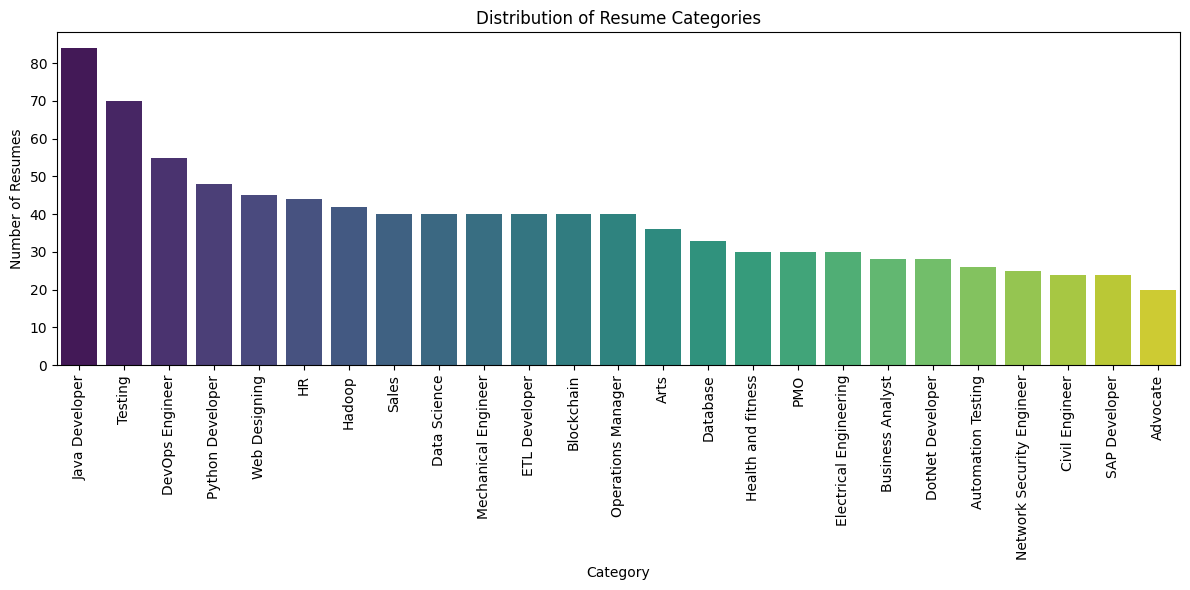

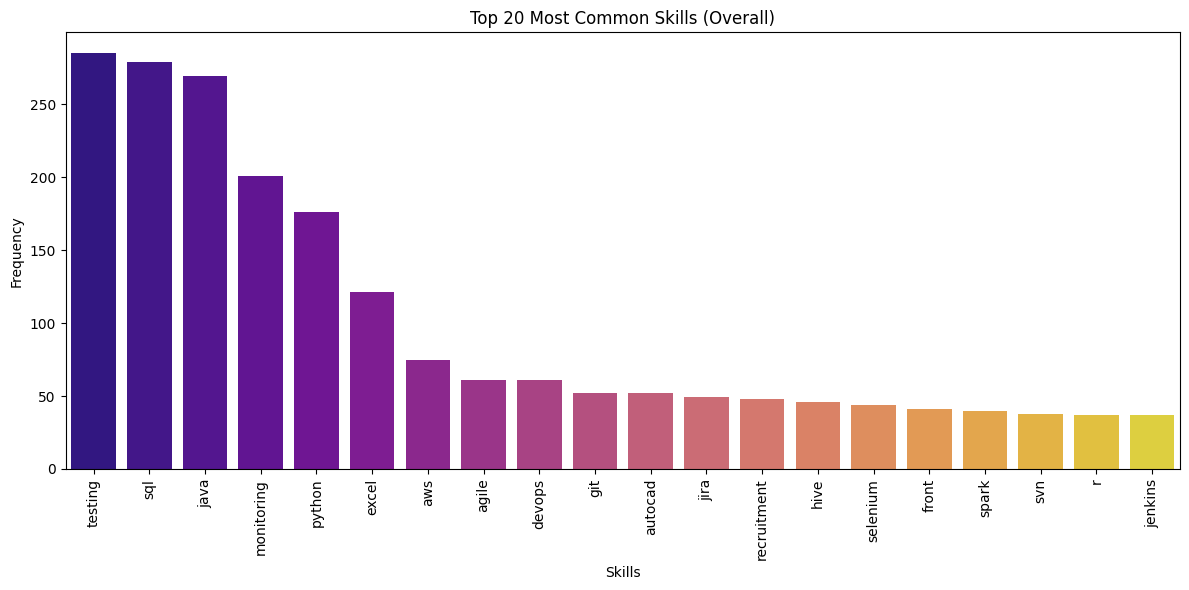

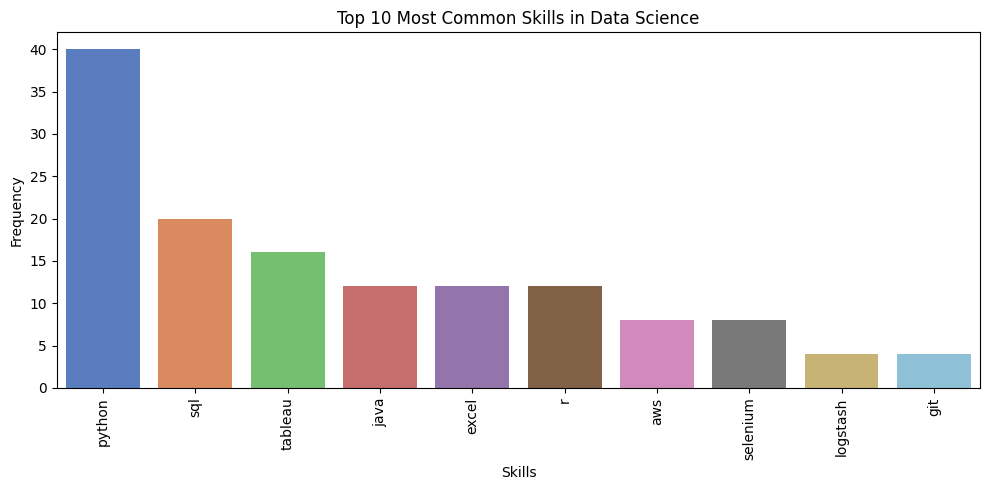

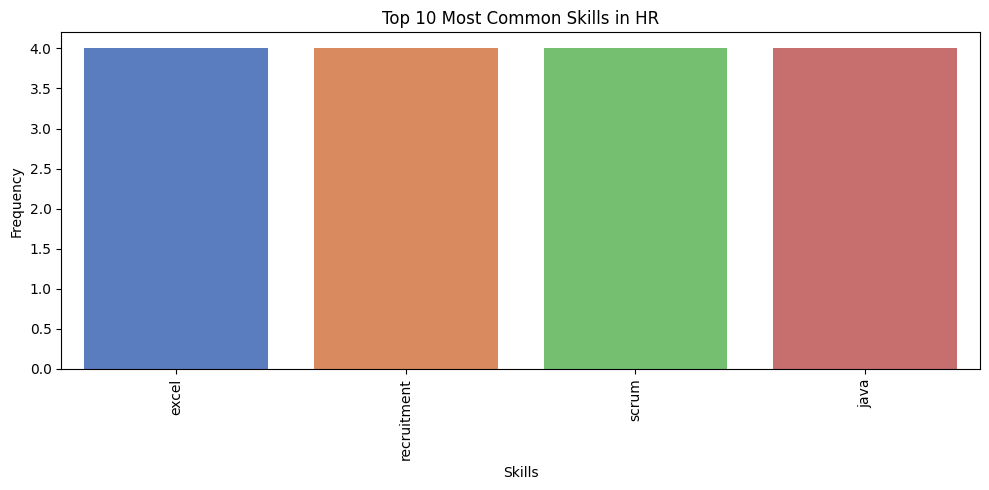

No skills found for category: Advocate


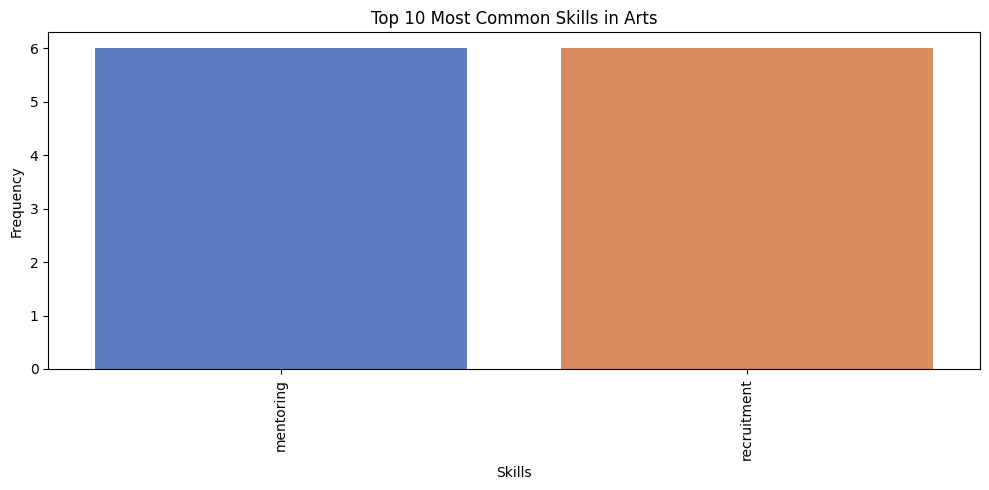

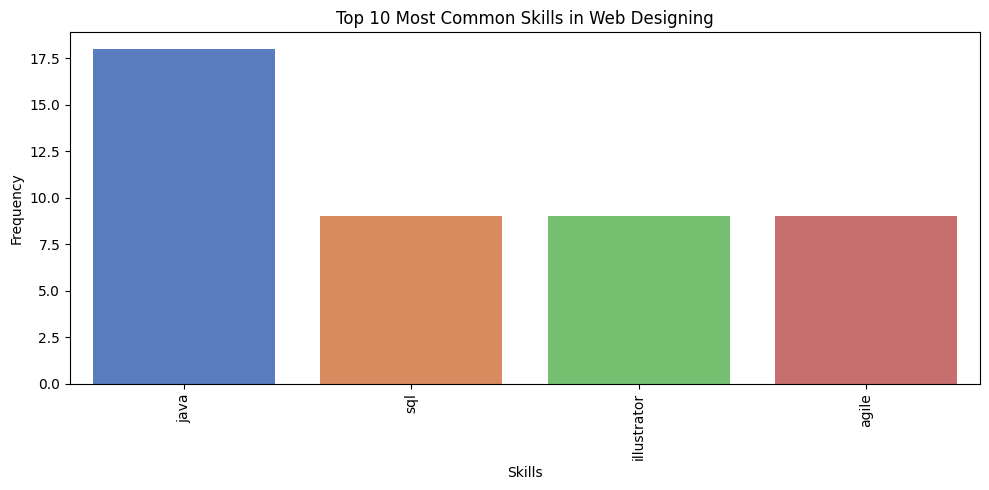

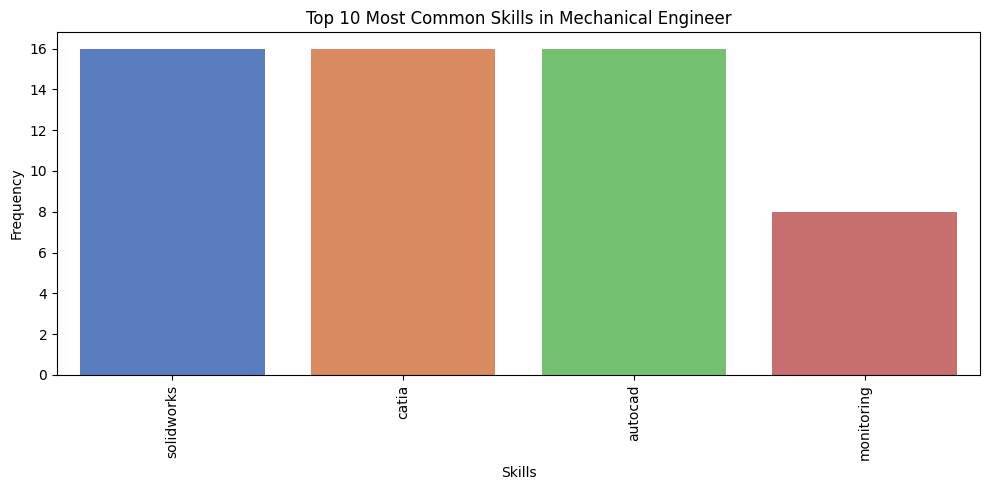

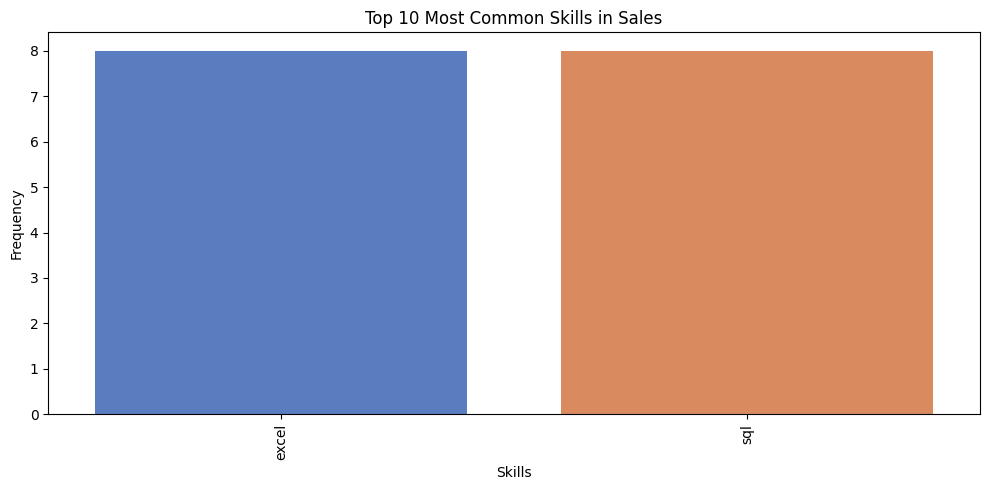

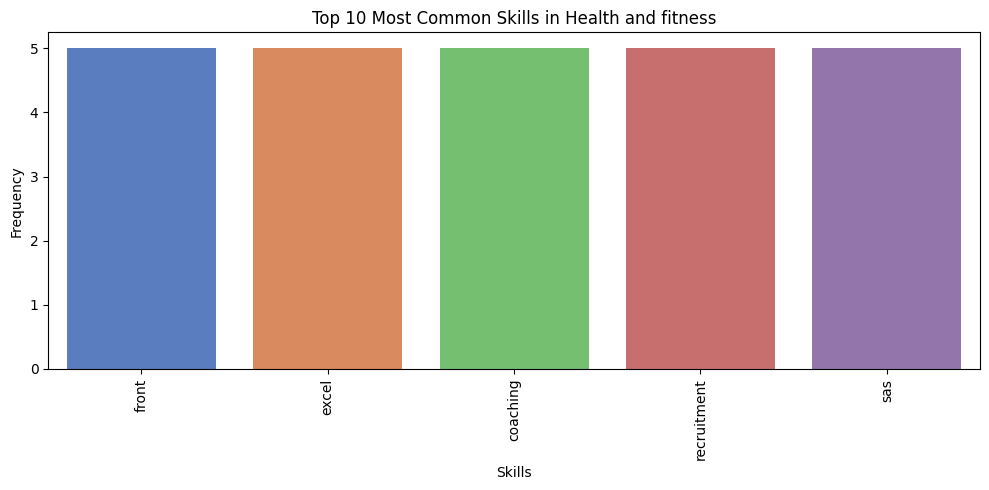

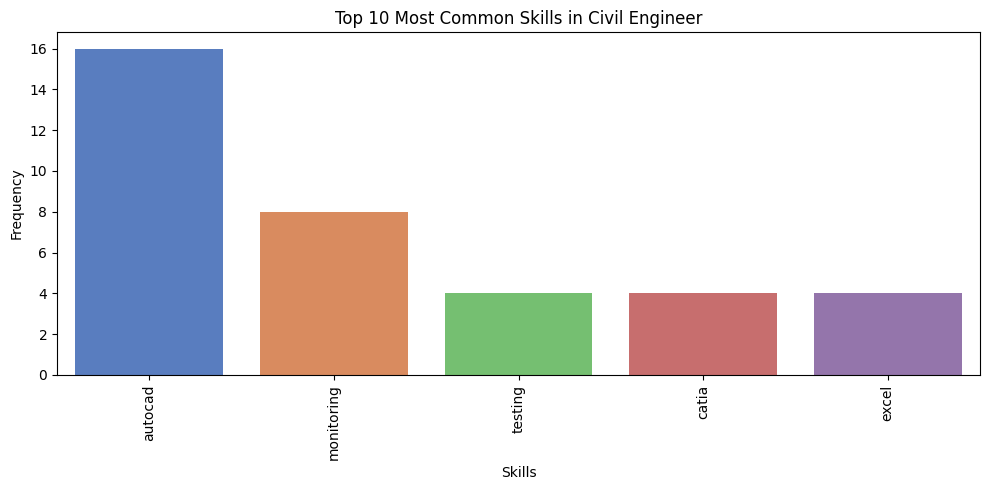

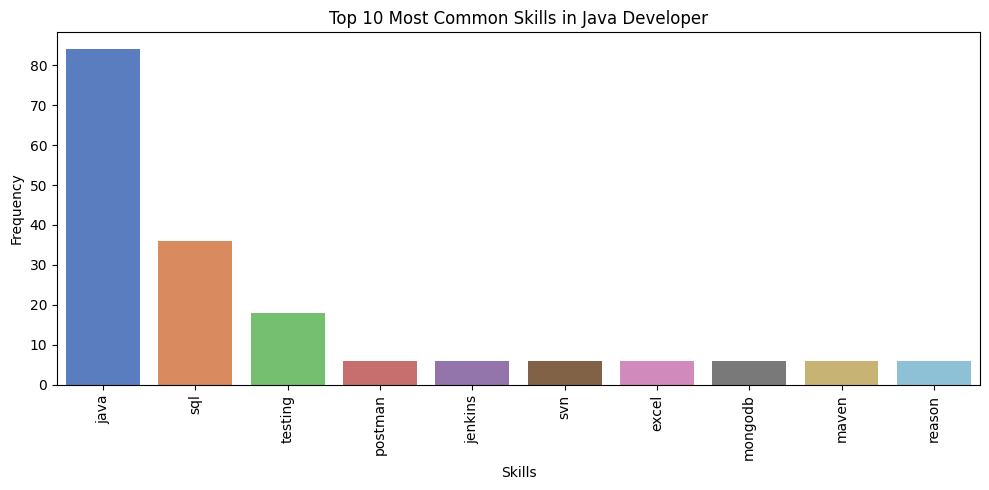

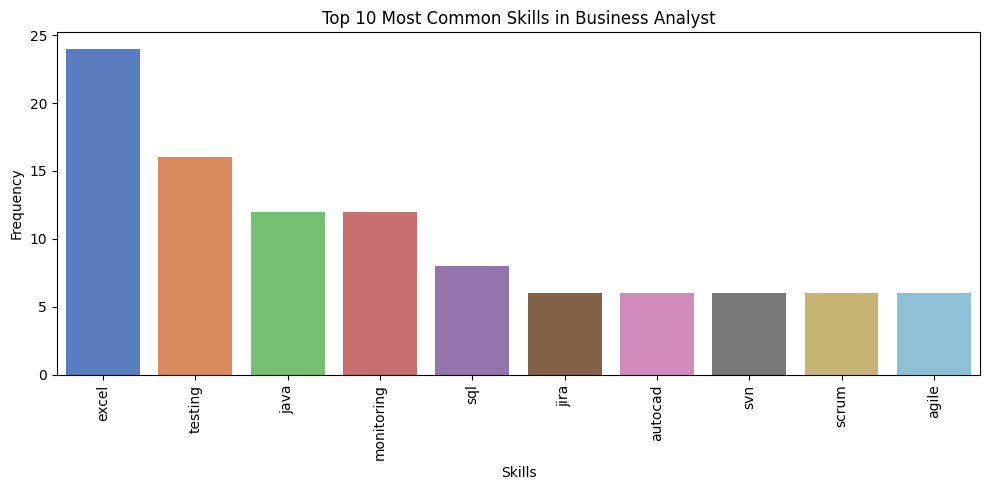

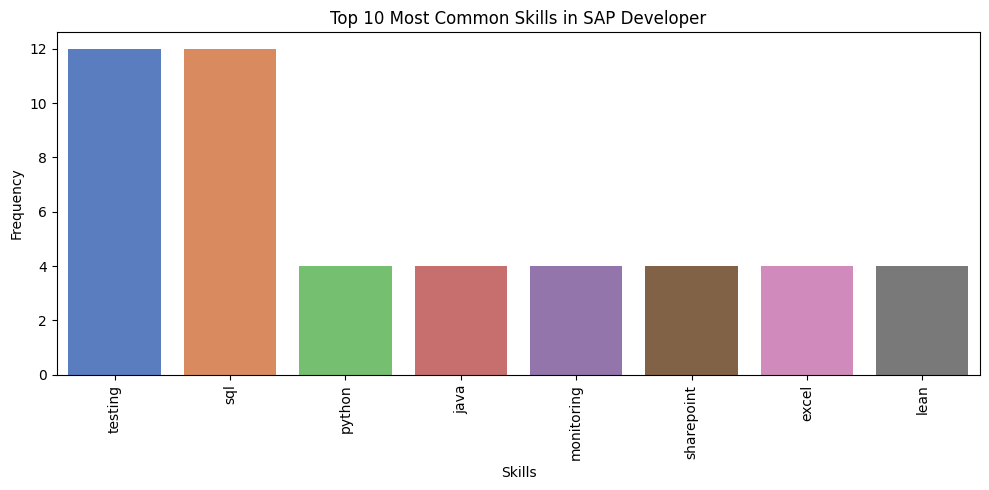

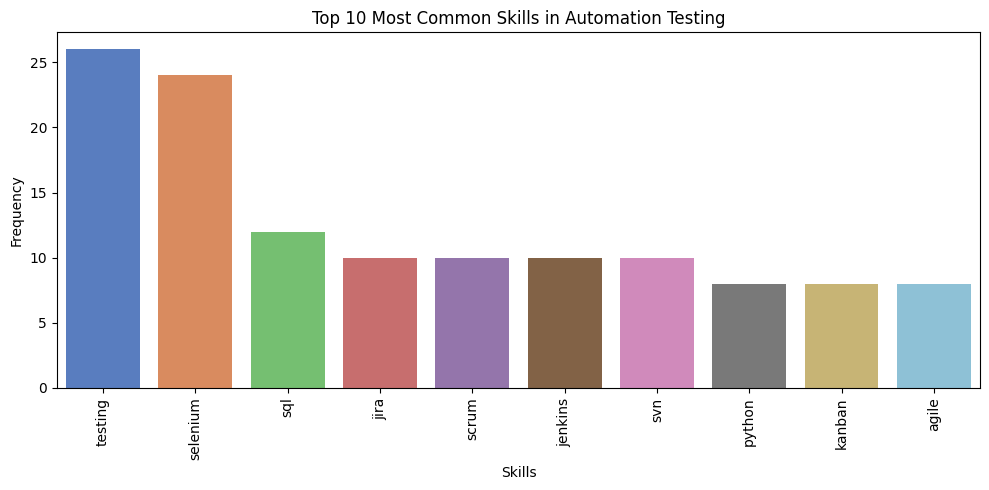

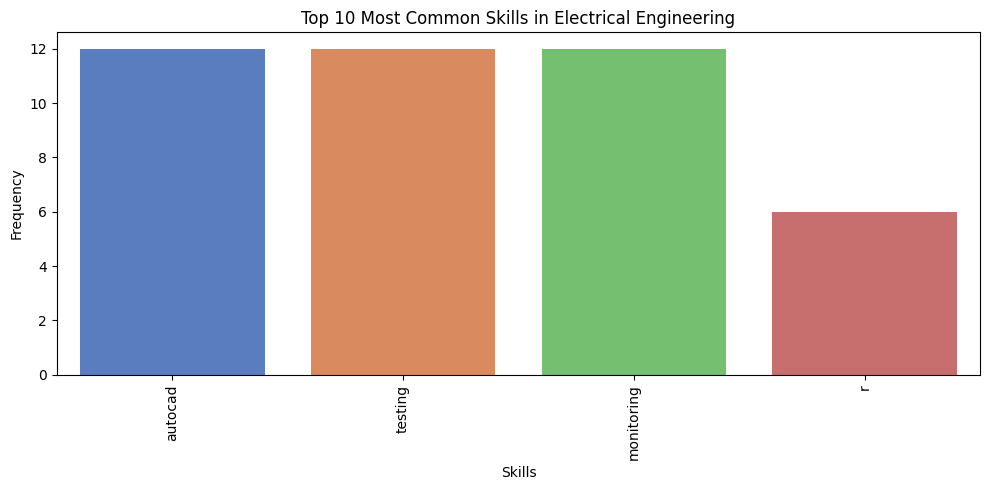

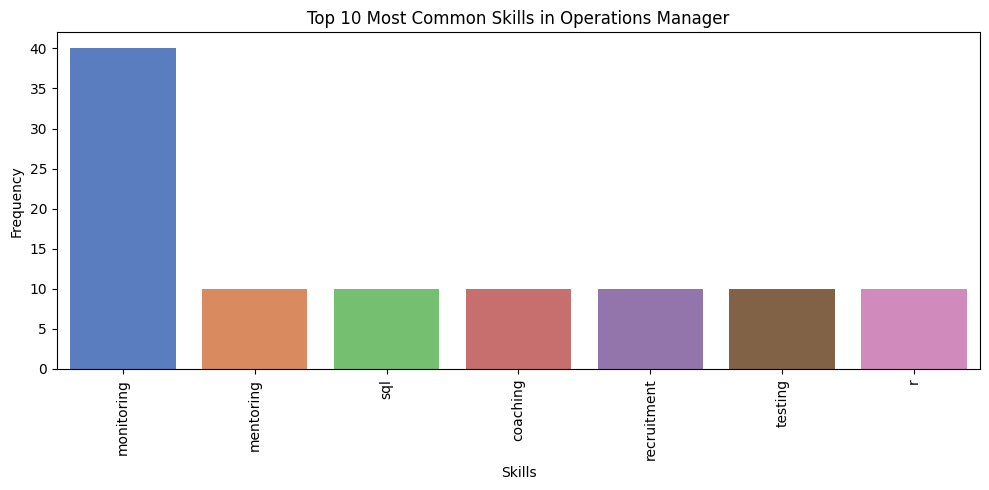

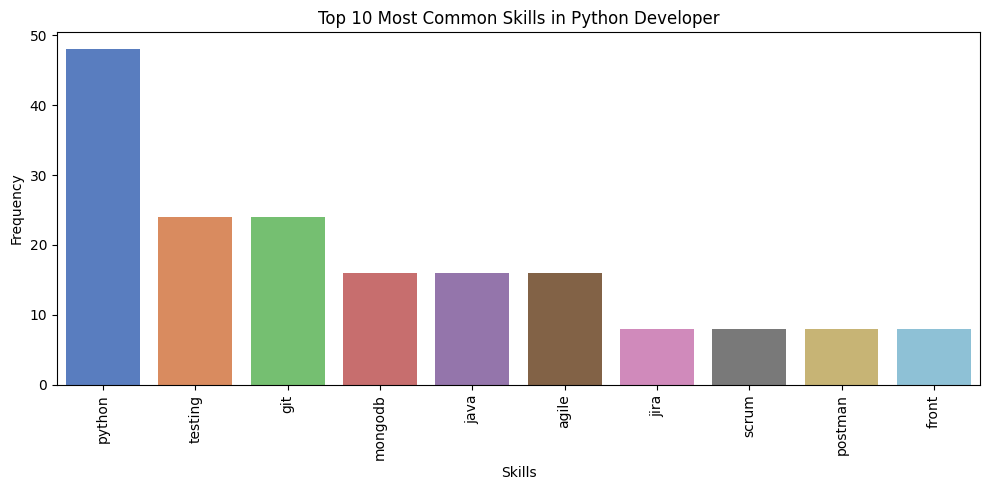

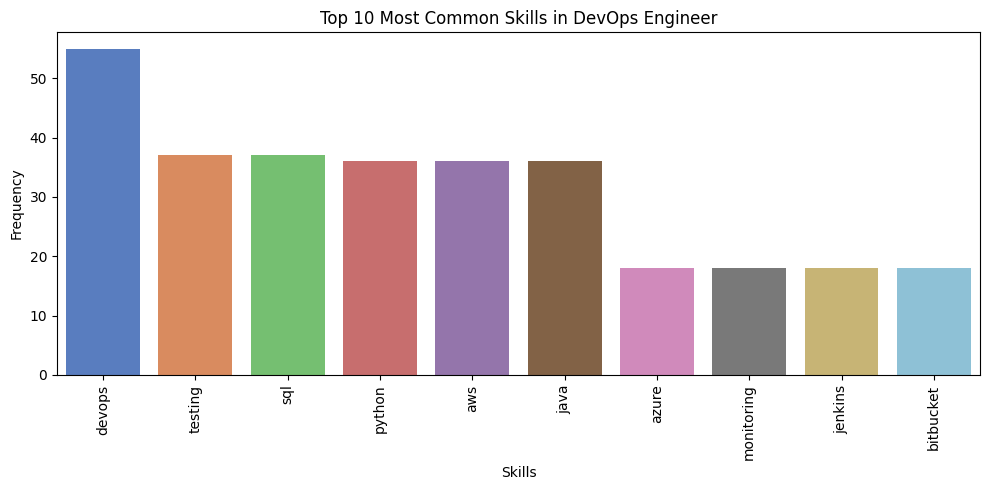

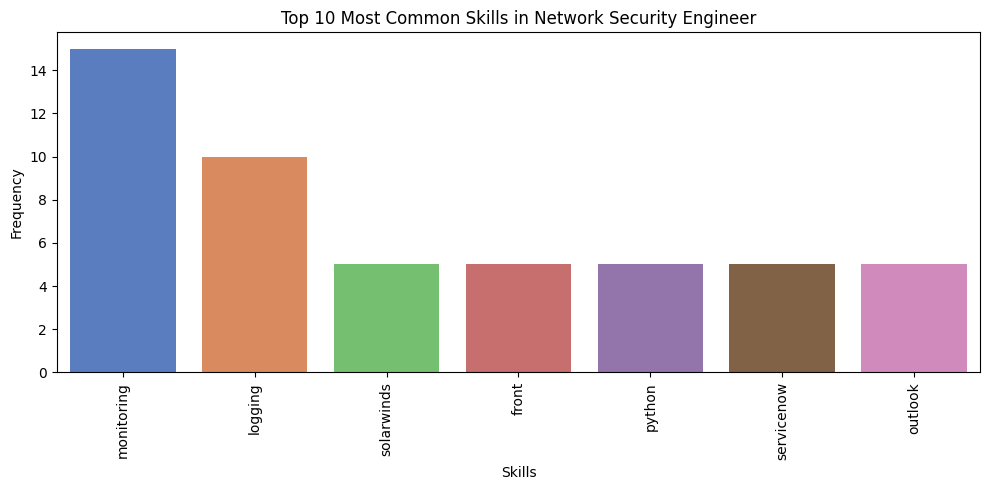

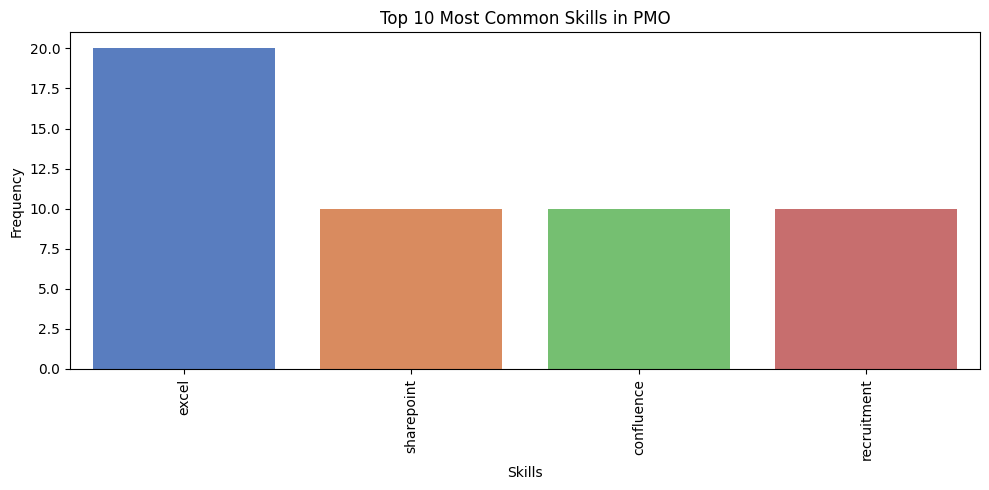

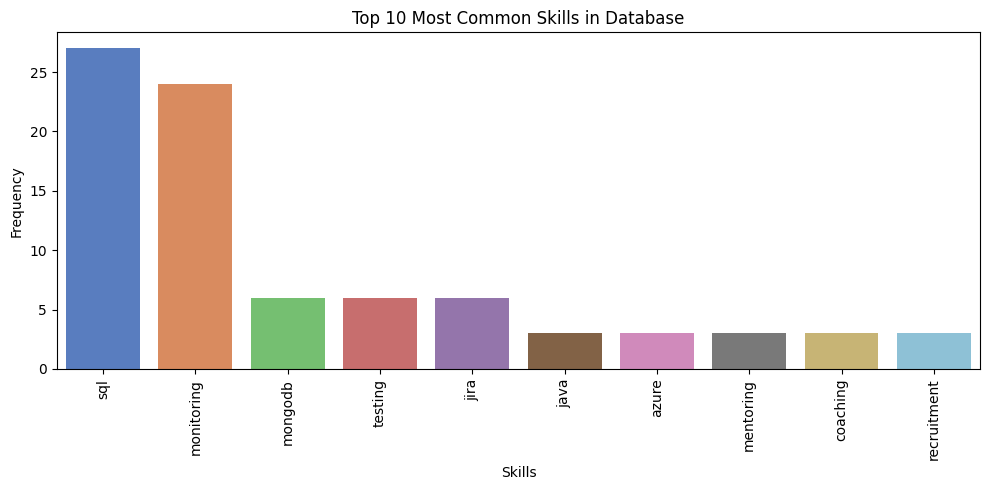

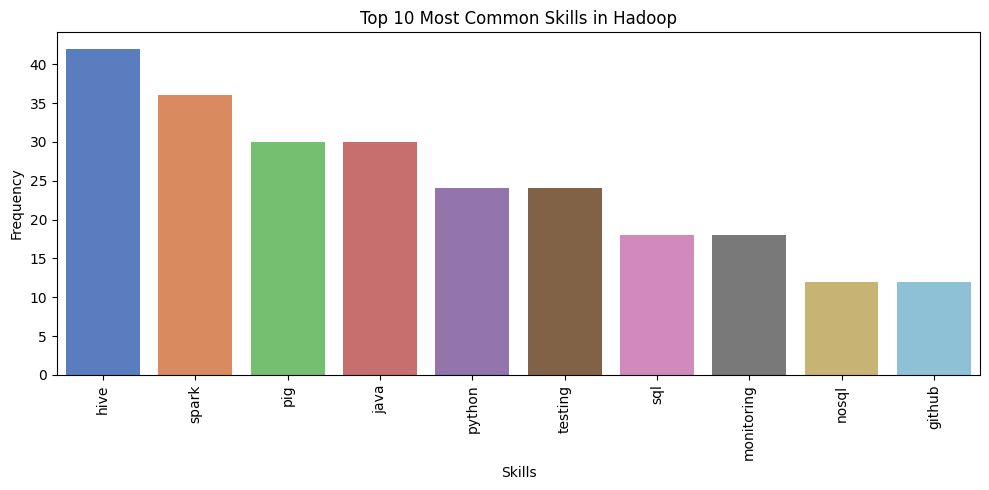

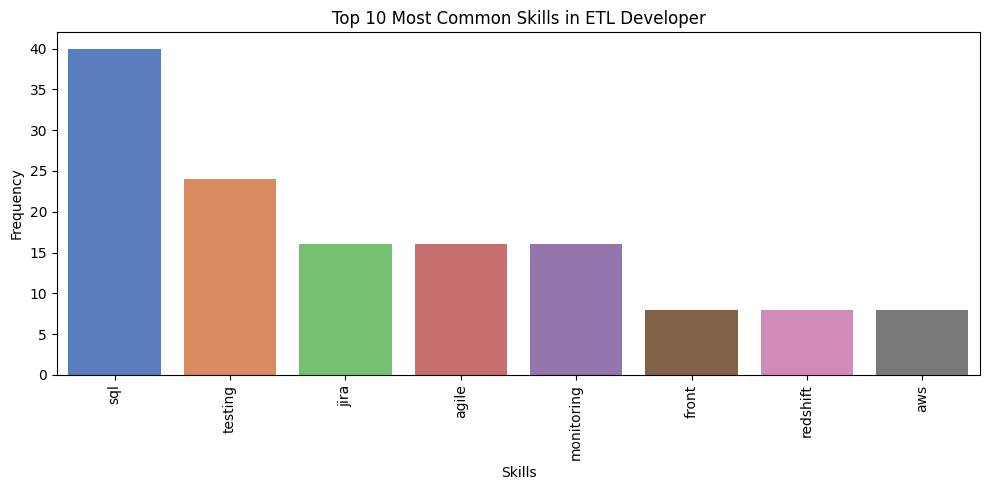

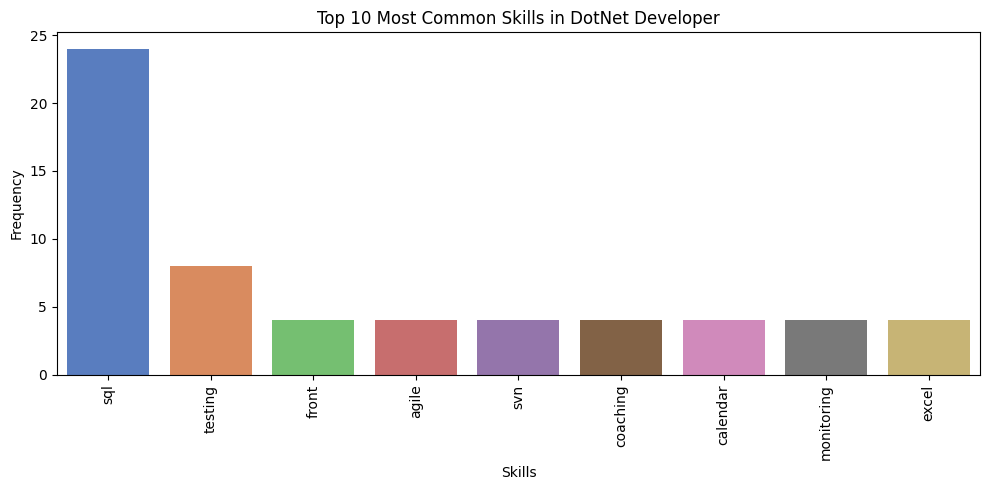

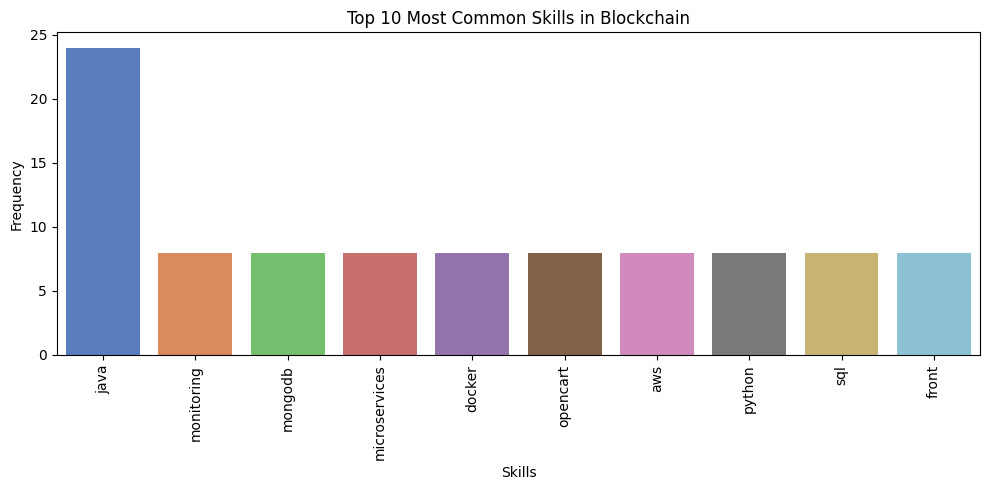

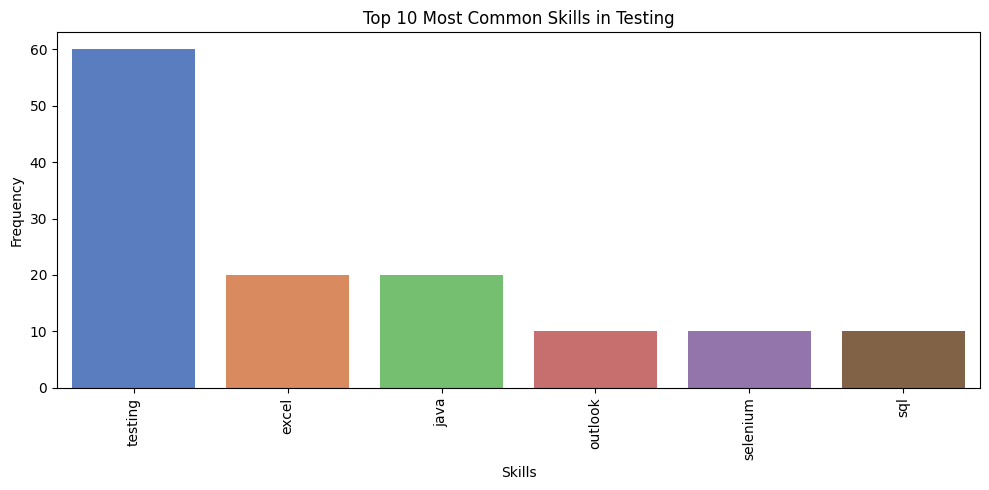

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot for the distribution of resume categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Resume Categories')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Bar plot for the overall most common skills (Top 20)
top_n_skills = 20
most_common_overall_skills = skill_counts_overall.most_common(top_n_skills)
skills_overall, counts_overall = zip(*most_common_overall_skills)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(skills_overall), y=list(counts_overall), palette='plasma')
plt.title(f'Top {top_n_skills} Most Common Skills (Overall)')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Bar plots for the most common skills within each category (Top 10)
top_n_skills_category = 10
for category, skill_counts in skill_counts_by_category.items():
    if skill_counts: # Check if there are any skills in the category
        most_common_category_skills = skill_counts.most_common(top_n_skills_category)
        skills_category, counts_category = zip(*most_common_category_skills)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(skills_category), y=list(counts_category), palette='muted')
        plt.title(f'Top {top_n_skills_category} Most Common Skills in {category}')
        plt.xlabel('Skills')
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No skills found for category: {category}")


## Interpret and refine

Analyze the generated visualizations and summarize the key insights regarding resume categories and skill distributions.


In [ ]:
print("Analysis of Visualizations:")

# 1. Analyze the distribution of resume categories
print("\n1. Distribution of Resume Categories:")
print(f"The most frequent category is '{category_counts.index[0]}' with {category_counts.values[0]} resumes.")
print(f"The least frequent category is '{category_counts.index[-1]}' with {category_counts.values[-1]} resumes.")
print("The bar plot clearly shows the uneven distribution of resumes across different categories, with some categories having significantly more samples than others.")

# 2. Analyze the top 20 most common skills overall
print("\n2. Top 20 Most Common Skills Overall:")
print("The most frequent skills overall are:")
for skill, count in skill_counts_overall.most_common(5): # Display top 5 for brevity
    print(f"- {skill}: {count}")
print("The overall skills plot highlights general technical and soft skills that are prevalent across many domains.")

# 3. Review the bar plots for each category
print("\n3. Most Common Skills by Category:")
print("Reviewing the bar plots for each category reveals distinct skill sets associated with different roles:")
for category, skill_counts in skill_counts_by_category.items():
    if skill_counts:
        most_common_category_skills = skill_counts.most_common(3) # Display top 3 for brevity
        print(f"  - In the '{category}' category, common skills include: {[skill for skill, count in most_common_category_skills]}")
    else:
        print(f"  - No skills found for the '{category}' category.")

# Summary
print("\nSummary of Observations:")
print("The dataset has an uneven distribution of resume categories. The analysis of skills shows that certain skills are universally important (e.g., testing, sql, java), while others are highly specific to particular categories (e.g., autocad for Mechanical and Civil Engineers, hive and spark for Hadoop, devops and aws for DevOps Engineers).")
print("The visualizations are generally clear. For better clarity in the category-specific skill plots, adjusting the figure size based on the number of categories or using subplots could improve readability if there were many categories with similar numbers of top skills. Additional visualizations could explore the relationship between education/experience entities and categories.")


Analysis of Visualizations:

1. Distribution of Resume Categories:
The most frequent category is 'Java Developer' with 84 resumes.
The least frequent category is 'Advocate' with 20 resumes.
The bar plot clearly shows the uneven distribution of resumes across different categories, with some categories having significantly more samples than others.

2. Top 20 Most Common Skills Overall:
The most frequent skills overall are:
- testing: 285
- sql: 279
- java: 269
- monitoring: 201
- python: 176
The overall skills plot highlights general technical and soft skills that are prevalent across many domains.

3. Most Common Skills by Category:
Reviewing the bar plots for each category reveals distinct skill sets associated with different roles:
  - In the 'Data Science' category, common skills include: ['python', 'sql', 'tableau']
  - In the 'HR' category, common skills include: ['excel', 'recruitment', 'scrum']
  - No skills found for the 'Advocate' category.
  - In the 'Arts' category, common s

## Develop matching logic

Develop functions or algorithms to compare the extracted features of a resume with the matching criteria or job description features.


In [ ]:
def calculate_skills_score(resume_skills, required_skills):
    """
    Calculates a skill matching score based on the overlap between resume and required skills.

    Args:
        resume_skills (list): A list of skills extracted from a resume.
        required_skills (list): A list of required skills for a job.

    Returns:
        float: The skill matching score (between 0 and 1).
    """
    if not required_skills:
        return 0.0  # Avoid division by zero if no required skills are provided

    resume_skills_set = set(resume_skills)
    required_skills_set = set(required_skills)

    # Calculate the intersection of the two sets (skills present in both lists)
    matching_skills = resume_skills_set.intersection(required_skills_set)

    # The score can be the proportion of required skills found in the resume
    score = len(matching_skills) / len(required_skills_set)

    return score

def calculate_education_score(resume_education, required_education):
    """
    Calculates an education matching score based on the overlap or relevance of education entities.

    Args:
        resume_education (list): A list of education entities extracted from a resume.
        required_education (list): A list of required education entities for a job.

    Returns:
        float: The education matching score (between 0 and 1).
    """
    if not required_education:
        return 0.0

    # This is a simplified approach. A more sophisticated approach would involve
    # fuzzy matching, hierarchy of degrees, and relevance of institutions/dates.
    # Here, we'll just check for the presence of any required education entity in the resume.
    resume_education_set = set(resume_education)
    required_education_set = set(required_education)

    matching_education = resume_education_set.intersection(required_education_set)

    # Score can be the proportion of required education entities found
    score = len(matching_education) / len(required_education_set)

    return score

def calculate_experience_score(resume_experience, required_experience):
    """
    Calculates an experience matching score based on the overlap or relevance of experience entities.

    Args:
        resume_experience (list): A list of experience entities extracted from a resume.
        required_experience (list): A list of required experience entities for a job.

    Returns:
        float: The experience matching score (between 0 and 1).
    """
    if not required_experience:
        return 0.0

    # Similar to education, this is a simplified approach. More advanced methods
    # would consider job titles, companies, and durations with more context.
    # Here, we check for the presence of any required experience entity.
    resume_experience_set = set(resume_experience)
    required_experience_set = set(required_experience)

    matching_experience = resume_experience_set.intersection(required_experience_set)

    # Score can be the proportion of required experience entities found
    score = len(matching_experience) / len(required_experience_set)

    return score


def calculate_overall_score(skills_score, education_score, experience_score, weights):
    """
    Calculates the overall matching score using weighted sum of individual scores.

    Args:
        skills_score (float): The skill matching score.
        education_score (float): The education matching score.
        experience_score (float): The experience matching score.
        weights (dict): A dictionary of weights for each feature.

    Returns:
        float: The overall matching score (between 0 and 1).
    """
    overall_score = (skills_score * weights.get('extracted_skills', 0)) + \
                    (education_score * weights.get('extracted_education', 0)) + \
                    (experience_score * weights.get('extracted_experience', 0))

    # Normalize the score by the sum of weights to keep it between 0 and 1
    total_weight = sum(weights.values())
    if total_weight > 0:
        overall_score /= total_weight
    else:
        overall_score = 0.0 # Or handle as appropriate if weights sum to zero

    return overall_score

print("Matching score calculation functions defined.")

Matching score calculation functions defined.
